# **Introdução NLP**

### **`Bibliotecas`**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import zipfile as zp

# **Parte-1: Análise Sentimento**

## **Aula 1: Classificação e exploração dos dados**

#### **Fazendo a leitura dos arquivos: - Duas formas de ler o arquivo 'Zipado'**

In [2]:
resenha = pd.read_csv('./imdb-reviews-pt-br.zip', compression = 'zip')
resenha.head(2)

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   

                                             text_pt sentiment  
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg  
1  Este é um exemplo do motivo pelo qual a maiori...       neg

In [3]:

with zp.ZipFile('imdb-reviews-pt-br.zip') as f:
     arquivo_csv = f.namelist()[0]       # Nome do primeiro arquivo zipado
     resenha = pd.read_csv(f.open(arquivo_csv))
          
resenha.head(3)

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   

                                             text_pt sentiment  
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg  
1  Este é um exemplo do motivo pelo qual a maiori...       neg  
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg

#### 
---

In [4]:
from sklearn.model_selection import train_test_split

train, test, class_train, class_test = train_test_split(resenha.text_pt,
                                                        resenha.sentiment,
                                                        random_state = 42)

In [5]:
class_train

1348     neg
27466    neg
29998    neg
48186    pos
26473    neg
        ... 
11284    neg
44732    pos
38158    pos
860      neg
15795    pos
Name: sentiment, Length: 37094, dtype: object

In [6]:
class_test

12532    pos
35445    neg
20279    pos
2969     neg
45161    pos
        ... 
16421    pos
39861    pos
309      neg
20638    pos
38935    pos
Name: sentiment, Length: 12365, dtype: object

In [7]:
resenha.sentiment.value_counts()

sentiment
neg    24765
pos    24694
Name: count, dtype: int64

In [8]:
classificacao = resenha['sentiment'].replace(['neg','pos'], [0, 1])
resenha['classificacao'] = classificacao

/tmp/ipykernel_30356/1301621568.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  classificacao = resenha['sentiment'].replace(['neg','pos'], [0, 1])


In [9]:
resenha[['sentiment', 'classificacao']].head(), resenha[['sentiment', 'classificacao']].tail()

(  sentiment  classificacao
 0       neg              0
 1       neg              0
 2       neg              0
 3       neg              0
 4       neg              0,
       sentiment  classificacao
 49454       pos              1
 49455       pos              1
 49456       pos              1
 49457       pos              1
 49458       pos              1)

In [10]:
from sklearn.linear_model import LogisticRegression

# regressao_logistica = LogisticRegression()
# regressao_logistica.fit(train, class_train)
# acuracia = regressao_logistica.score(test, class_test)
# print(acuracia)

## **Aula 2: Bag of words**

### **Como o Bag of words funciona**

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix


texto = ['Assisti um filme ótimo', 'Assisti um filme ruim']

vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)
bag_of_words

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (2, 5)>

In [12]:
vetorizar.get_feature_names_out()

array(['Assisti', 'filme', 'ruim', 'um', 'ótimo'], dtype=object)

In [13]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                                                   columns=vetorizar.get_feature_names_out())


In [14]:
matriz_esparsa

Assisti  filme  ruim  um  ótimo
0        1      1     0   1      1
1        1      1     1   1      0

### **Aplicando no conjunto de dados**

In [15]:
vetorizar = CountVectorizer(lowercase = False, max_features = 50) #max_features pegou as 50 palavras mais relevantes de cada resenha
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
bag_of_words.shape

(49459, 50)

In [16]:
def classificar_texto(df, corpus, label):
     vetorizar = CountVectorizer(lowercase = False, max_features = 50) #max_features pegou as 50 palavras mais relevantes de cada resenha
     bag_of_words = vetorizar.fit_transform(df[corpus])
     train, test, class_train, class_test = train_test_split(bag_of_words,
                                                            df[label],
                                                            random_state = 42)

     regressao_logistica = LogisticRegression()
     regressao_logistica.fit(train, class_train)
     return round(regressao_logistica.score(test, class_test),4)

print(f'{classificar_texto(resenha,'text_pt', 'classificacao')}%')

0.6583%


## **Aula 3: Vizualizando os dados WordCloud**

In [17]:
from wordcloud import WordCloud

palavras = ' '.join([texto for texto in resenha.text_pt])

type(palavras)
len(palavras)

63448424

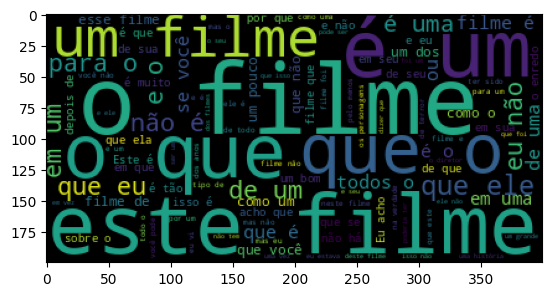

In [18]:
# Vizualizando a nuvem de palavras
nuvem_palavras = WordCloud().generate(palavras)

plt.figure()
plt.imshow(nuvem_palavras)
plt.show()

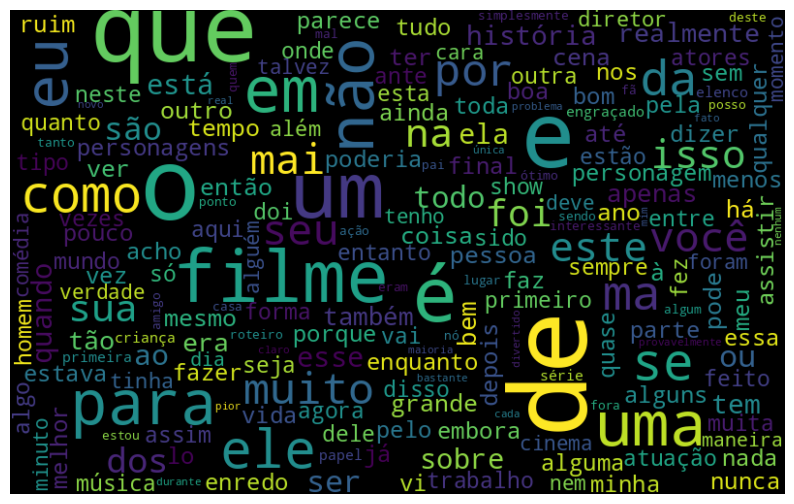

In [19]:
# Melhorando a vizualização da nuvem de palavras
nuvem_palavras2 = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False).generate(palavras)

plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras2, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [28]:
resenha.sentiment

0        neg
1        neg
2        neg
3        neg
4        neg
        ... 
49454    pos
49455    pos
49456    pos
49457    pos
49458    pos
Name: sentiment, Length: 49459, dtype: object

In [29]:
# Separando por tipo (negativo e positivo)

resenha.query('sentiment == "pos"').head()

id                                            text_en  \
12389  12391  I went and saw this movie last night after bei...   
12390  12392  Actor turned director Bill Paxton follows up h...   
12391  12393  As a recreational golfer with some knowledge o...   
12392  12394  I saw this film in a sneak preview, and it is ...   
12393  12395  Bill Paxton has taken the true story of the 19...   

                                                 text_pt sentiment  \
12389  Eu fui e vi este filme ontem à noite depois de...       pos   
12390  O diretor do ator, Bill Paxton, segue sua prom...       pos   
12391  Como um jogador de recreio com algum conhecime...       pos   
12392  Eu vi esse filme em uma prévia, e é delicioso....       pos   
12393  Bill Paxton levou a verdadeira história do gol...       pos   

       classificacao  
12389              1  
12390              1  
12391              1  
12392              1  
12393              1

In [30]:
resenha.query('sentiment != "pos"').head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0  
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0  
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0  
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0  
4  Filmes de fotos de latão não é uma palavra apr...       neg              0

In [32]:
def nuvem_palavras_neg(coluna_corpus, data = resenha):
     texto_negativo = data.query('sentiment != "neg"')
     palavras = ' '.join([corpus for corpus in texto_negativo[coluna_corpus]])
     nuvem_palavras2 = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False).generate(palavras)

     plt.figure(figsize=(10,7))
     plt.imshow(nuvem_palavras2, interpolation = 'bilinear')
     plt.title('Nuvem de Palavras Negativas')
     plt.axis('off')
     plt.show()

In [33]:
def nuvem_palavras_pos(coluna_corpus, data = resenha):
     texto_positivo = data.query('sentiment != "pos"')
     palavras = ' '.join([corpus for corpus in texto_positivo[coluna_corpus]])
     nuvem_palavras2 = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False).generate(palavras)

     plt.figure(figsize=(10,7))
     plt.imshow(nuvem_palavras2, interpolation = 'bilinear')
     plt.title('Nuvem de Palavras Positivas')

     plt.axis('off')
     plt.show()

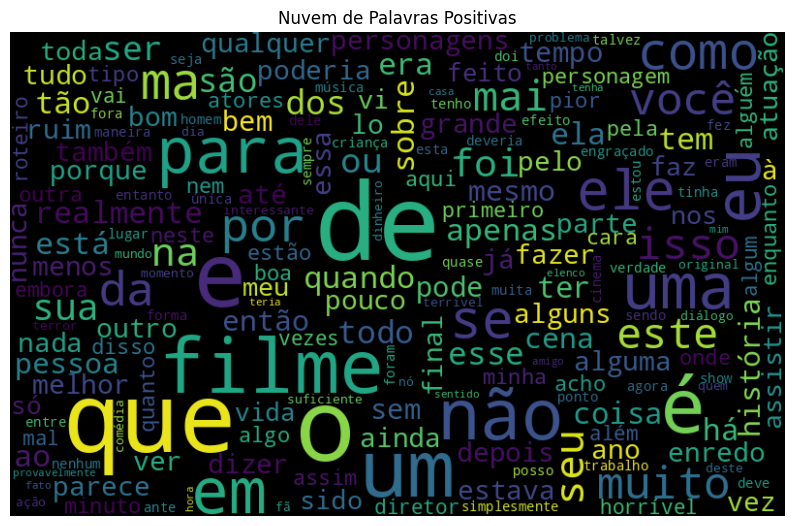

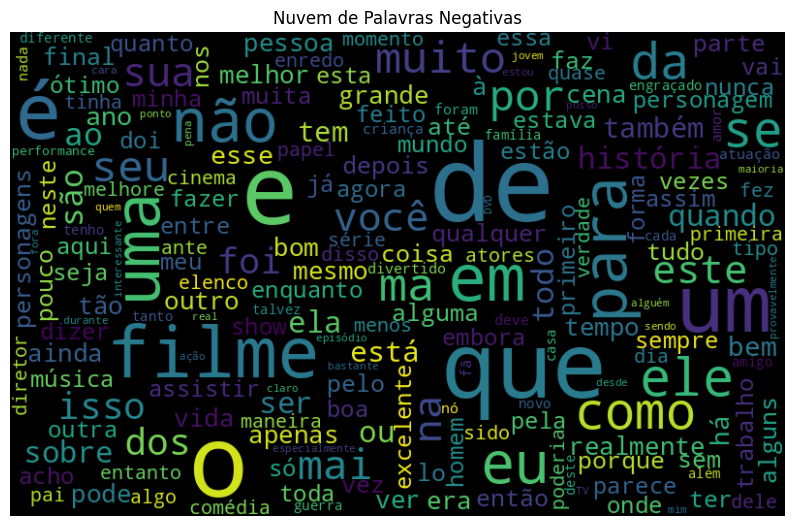

In [34]:
nuvem_palavras_pos('text_pt')
nuvem_palavras_neg('text_pt')

## **Aula 4: Tokenização - NLTK**

In [35]:
import nltk 

frase = ['um filme bom', 'um filme ruim']
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'um filme bom': 1, 'um filme ruim': 1})

In [36]:
from nltk import tokenize

frase = 'Bem vindo ao mundo do PLN!'

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
token_frase

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']

In [37]:
# Aplicando Tokenização

token_corpus = token_espaco.tokenize(palavras)
frequencia = nltk.FreqDist(token_corpus)
df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                                   'Frequência': list(frequencia.values())})

df_frequencia.nlargest(columns = 'Frequência', n = 10)

Palavra  Frequência
20       de      417651
14      que      325070
42        e      299743
3         o      244881
7        um      216410
102       a      210179
45        é      192381
200      em      132778
1       uma      130888
29      não      127915

## **Aula 5: Nova vizualização e os stop words**

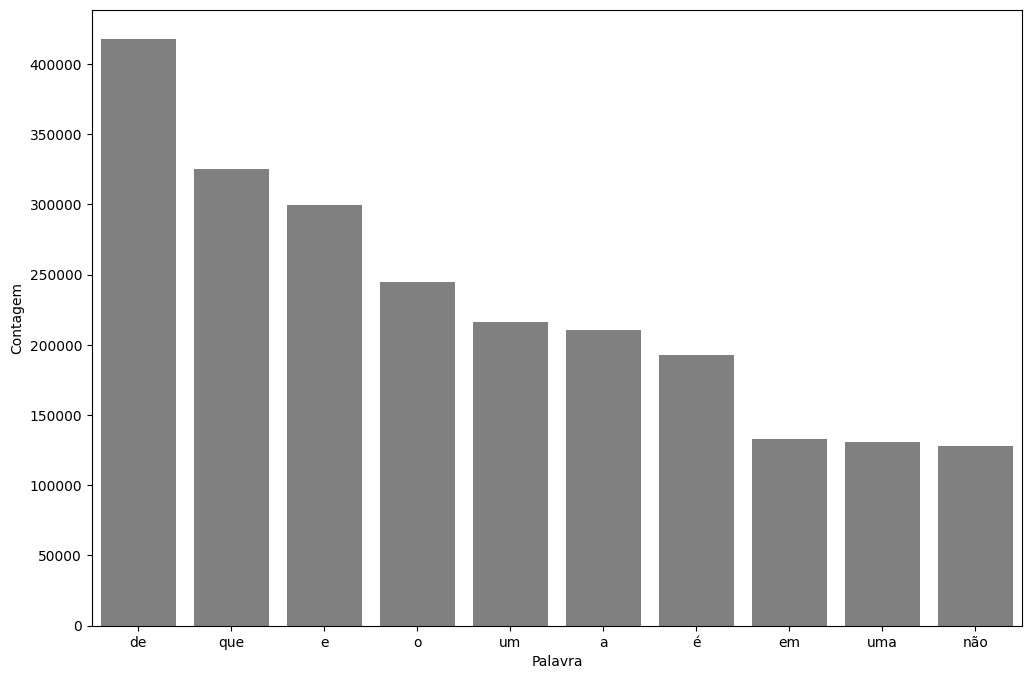

In [38]:
import seaborn as sns

def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                                   'Frequência': list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = 'Frequência', n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = 'Palavra', y = 'Frequência', color = 'gray')
    ax.set(ylabel = 'Contagem')
    plt.show()

pareto(resenha, 'text_pt', 10)

In [39]:
from nltk.corpus import stopwords

palavras_irrelevantes = stopwords.words('portuguese')
print(palavras_irrelevantes)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [40]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0  
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0  
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0  
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0  
4  Filmes de fotos de latão não é uma palavra apr...       neg              0

In [41]:
frase_processada = []
for opiniao in resenha.text_pt:
     nova_frase = []
     palavras_texto = token_espaco.tokenize(opiniao)
     for palavra in palavras_texto:
          if palavra not in palavras_irrelevantes:
               nova_frase.append(palavra)
               
     frase_processada.append(' '.join(nova_frase))
     
resenha['tratamento_1'] = frase_processada

In [42]:
acuracia_teste = classificar_texto(resenha, 'tratamento_1', 'classificacao')
acuracia_teste

0.681

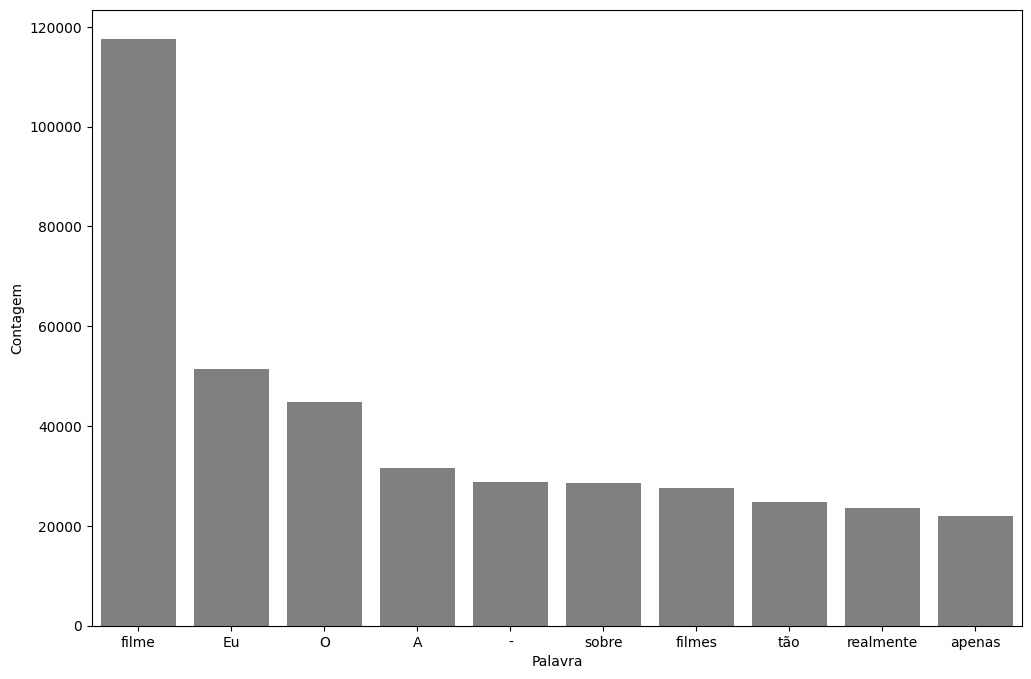

In [43]:
pareto(resenha, 'tratamento_1', 10)

# **Parte-2: Análise Sentimento**

## **Aula-1: Melhorando a vizualização do pareto**

In [44]:
# Como separar pontuações
from nltk import tokenize

frase = 'Olá mundo!'
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)

token_frase

['Olá', 'mundo', '!']

In [45]:
from string import punctuation

pontuacao = []
for ponto in punctuation:
    pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = []
for opiniao in resenha['tratamento_1']:
    nova_frase = []
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha['tratamento_2'] = frase_processada

In [46]:
resenha

id                                            text_en  \
0          1  Once again Mr. Costner has dragged out a movie...   
1          2  This is an example of why the majority of acti...   
2          3  First of all I hate those moronic rappers, who...   
3          4  Not even the Beatles could write songs everyon...   
4          5  Brass pictures movies is not a fitting word fo...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  \
0      Mais uma vez, o Sr. Costner arrumou um filme p...       neg   
1      Este é um exemplo do motivo pelo qual a maiori...       neg   
2      Primeiro de tudo eu odeio esses raps imbecis, ...       neg   
3      Nem mesmo os Beatles puderam escrever músicas ...       neg   
4      Filmes de fotos de latão não é uma palavra apr...       neg   
...                                                  ...       ...   
49454  Como a média de votos era muito baixa, e o fat...       pos   
49455  O enredo teve algumas reviravoltas infelizes e...       pos   
49456  Estou espantado com a forma como este filme e ...       pos   
49457  A Christmas Together realmente veio antes do m...       pos   
49458  O drama romântico da classe trabalhadora do di...       pos   

       classificacao                                       tratamento_1  \
0                  0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1                  0  Este exemplo motivo maioria filmes ação mesmos...   
2                  0  Primeiro tudo odeio raps imbecis, poderiam agi...   
3                  0  Nem Beatles puderam escrever músicas todos gos...   
4                  0  Filmes fotos latão palavra apropriada eles, ve...   
...              ...                                                ...   
49454              1  Como média votos baixa, fato funcionário locad...   
49455              1  O enredo algumas reviravoltas infelizes inacre...   
49456              1  Estou espantado forma filme maioria outros méd...   
49457              1  A Christmas Together realmente veio antes temp...   
49458              1  O drama romântico classe trabalhadora diretor ...   

                                            tratamento_2  
0      Mais vez Sr Costner arrumou filme tempo necess...  
1      Este exemplo motivo maioria filmes ação mesmos...  
2      Primeiro tudo odeio raps imbecis poderiam agir...  
3      Nem Beatles puderam escrever músicas todos gos...  
4      Filmes fotos latão palavra apropriada verdade ...  
...                                                  ...  
49454  Como média votos baixa fato funcionário locado...  
49455  O enredo algumas reviravoltas infelizes inacre...  
49456  Estou espantado forma filme maioria outros méd...  
49457  A Christmas Together realmente veio antes temp...  
49458  O drama romântico classe trabalhadora diretor ...  

[49459 rows x 7 columns]

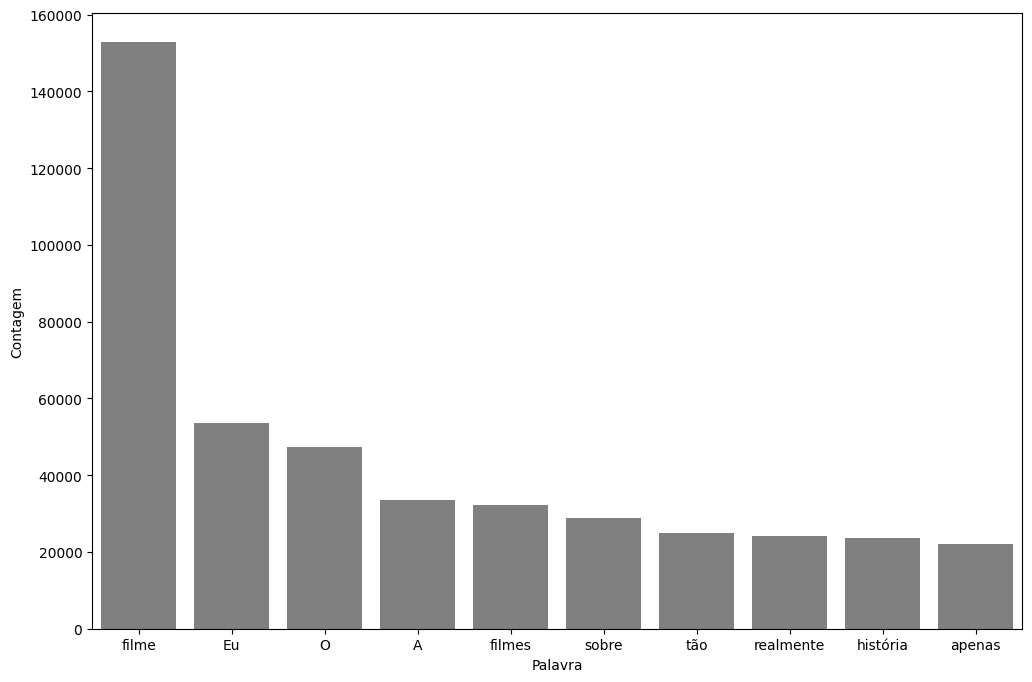

In [47]:
pareto(resenha, 'tratamento_2', 10)

## **Aula 2: Normalização de textos** 

In [48]:
# Retirando a pontuação

import unidecode

import unidecode

acentos = 'ótimo péssimo não é tão'

teste = unidecode.unidecode(acentos)
print(teste)

otimo pessimo nao e tao


In [49]:
sem_acentos = [unidecode.unidecode(texto) for texto in resenha['tratamento_2']]
sem_acentos[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [50]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]
stopwords_sem_acento

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'a',
 'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'as',
 'ate',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'eramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'esta',
 'estamos',
 'estao',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estavamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiveramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivessemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'foramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fossemos',
 'fui',
 'ha',
 'haja

In [51]:
resenha['tratamento_3'] = sem_acentos

frase_processada = []
for opiniao in resenha['tratamento_3']:
    nova_frase = []
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha['tratamento_3'] = frase_processada

In [52]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0   
4  Filmes de fotos de latão não é uma palavra apr...       neg              0   

                                        tratamento_1  \
0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis, poderiam agi...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada eles, ve...   

                                        tratamento_2  \
0  Mais vez Sr Costner arrumou filme tempo necess...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis poderiam agir...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada verdade ...   

                                        tratamento_3  
0  Mais vez Sr Costner arrumou filme tempo necess...  
1  Este exemplo motivo maioria filmes acao mesmos...  
2  Primeiro tudo odeio raps imbecis poderiam agir...  
3  Nem Beatles puderam escrever musicas todos gos...  
4  Filmes fotos latao palavra apropriada verdade ...

In [53]:
acuracia_tratamento3 = classificar_texto(resenha, 'tratamento_3', 'classificacao')
acuracia_tratamento3

0.6888

In [54]:
acuracia_teste

0.681

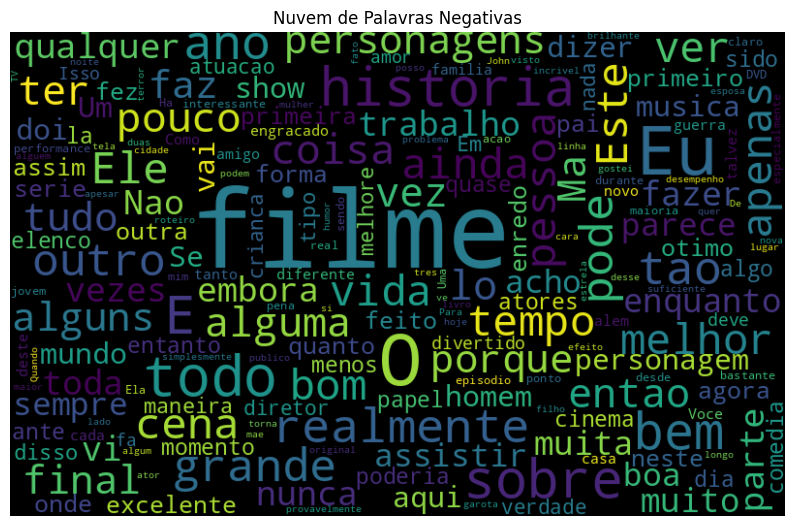

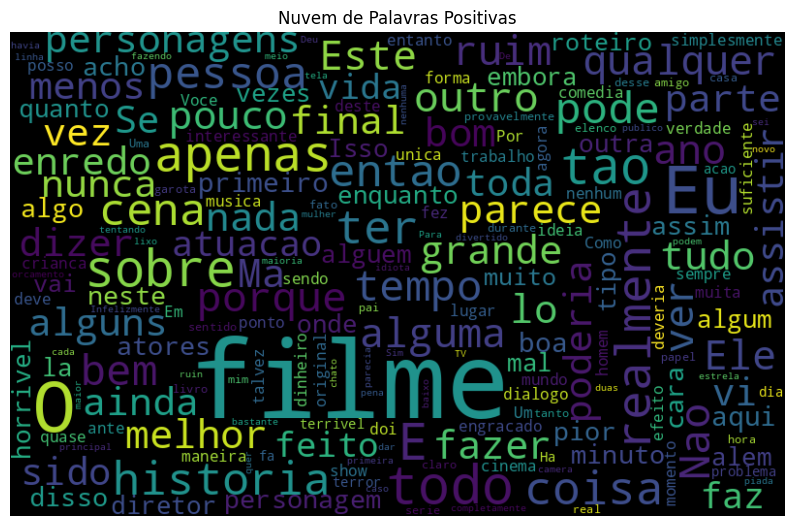

In [55]:
nuvem_palavras_neg('tratamento_3', resenha)
nuvem_palavras_pos('tratamento_3', resenha)

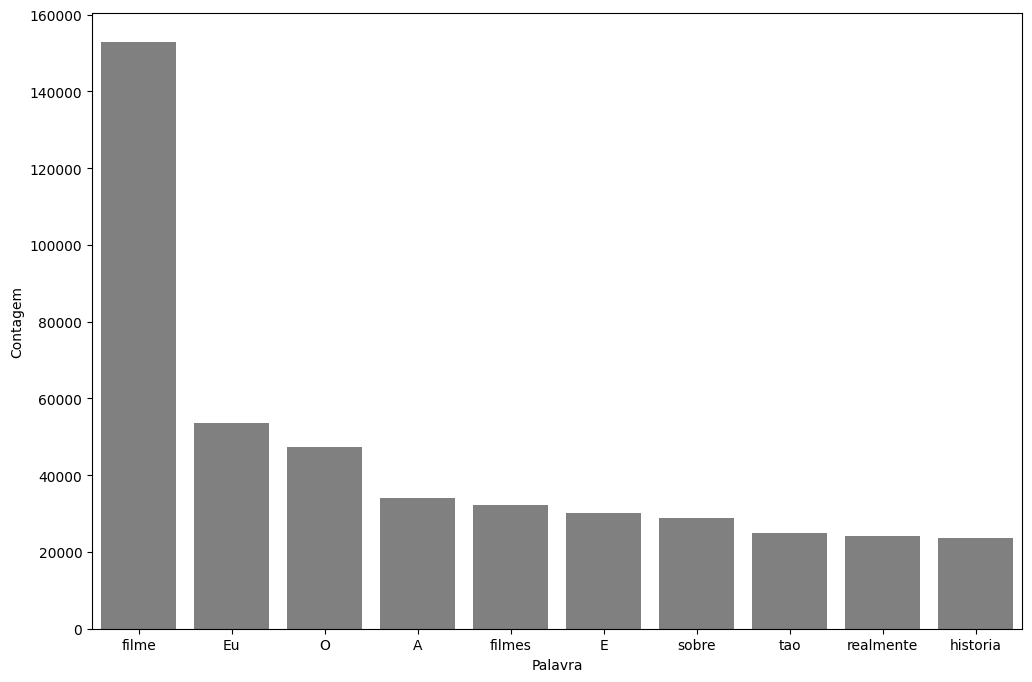

In [56]:
pareto(resenha, 'tratamento_3', 10)

In [57]:
resenha[['text_pt', 'tratamento_3']]

text_pt  \
0      Mais uma vez, o Sr. Costner arrumou um filme p...   
1      Este é um exemplo do motivo pelo qual a maiori...   
2      Primeiro de tudo eu odeio esses raps imbecis, ...   
3      Nem mesmo os Beatles puderam escrever músicas ...   
4      Filmes de fotos de latão não é uma palavra apr...   
...                                                  ...   
49454  Como a média de votos era muito baixa, e o fat...   
49455  O enredo teve algumas reviravoltas infelizes e...   
49456  Estou espantado com a forma como este filme e ...   
49457  A Christmas Together realmente veio antes do m...   
49458  O drama romântico da classe trabalhadora do di...   

                                            tratamento_3  
0      Mais vez Sr Costner arrumou filme tempo necess...  
1      Este exemplo motivo maioria filmes acao mesmos...  
2      Primeiro tudo odeio raps imbecis poderiam agir...  
3      Nem Beatles puderam escrever musicas todos gos...  
4      Filmes fotos latao palavra apropriada verdade ...  
...                                                  ...  
49454  Como media votos baixa fato funcionario locado...  
49455  O enredo algumas reviravoltas infelizes inacre...  
49456  Estou espantado forma filme maioria outros med...  
49457  A Christmas Together realmente veio antes temp...  
49458  O drama romantico classe trabalhadora diretor ...  

[49459 rows x 2 columns]

In [58]:
frase = 'O Thiago é o novo instrutor da Alura'
print(frase.lower())

o thiago é o novo instrutor da alura


In [59]:
frase_processada = []
for opiniao in resenha['tratamento_3']:
    nova_frase = []
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha['tratamento_4'] = frase_processada

In [60]:
resenha['text_pt'][0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [61]:
resenha['tratamento_4'][0]

'vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado unico obstaculo parece vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora'

In [62]:
acuracia_tratamento4 = classificar_texto(resenha, 'tratamento_4', 'classificacao')
print(acuracia_tratamento4)
print(acuracia_tratamento3)

0.6881
0.6888


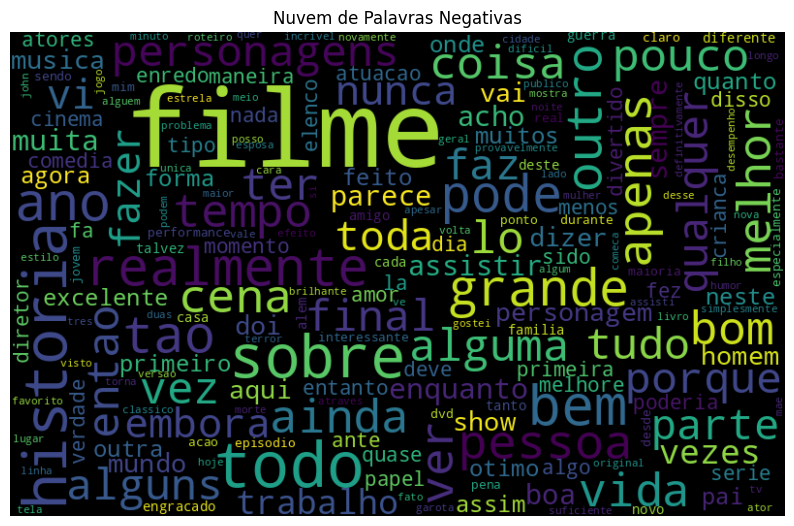

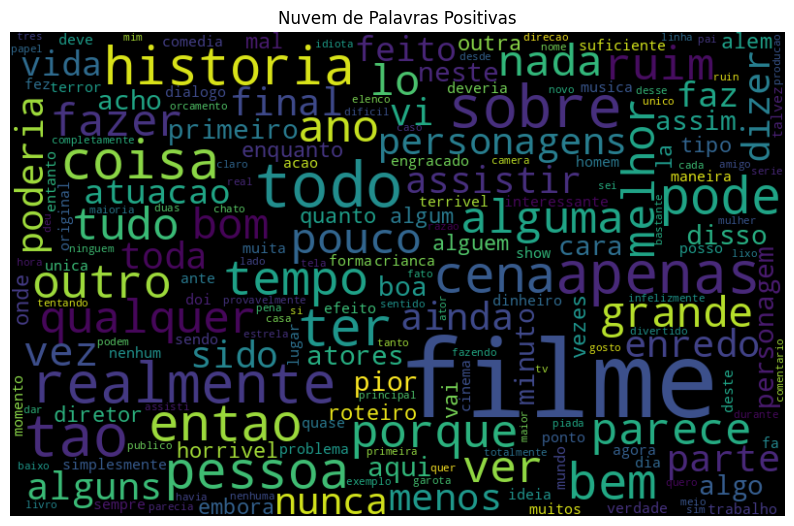

In [63]:
nuvem_palavras_neg('tratamento_4', resenha)
nuvem_palavras_pos('tratamento_4', resenha)

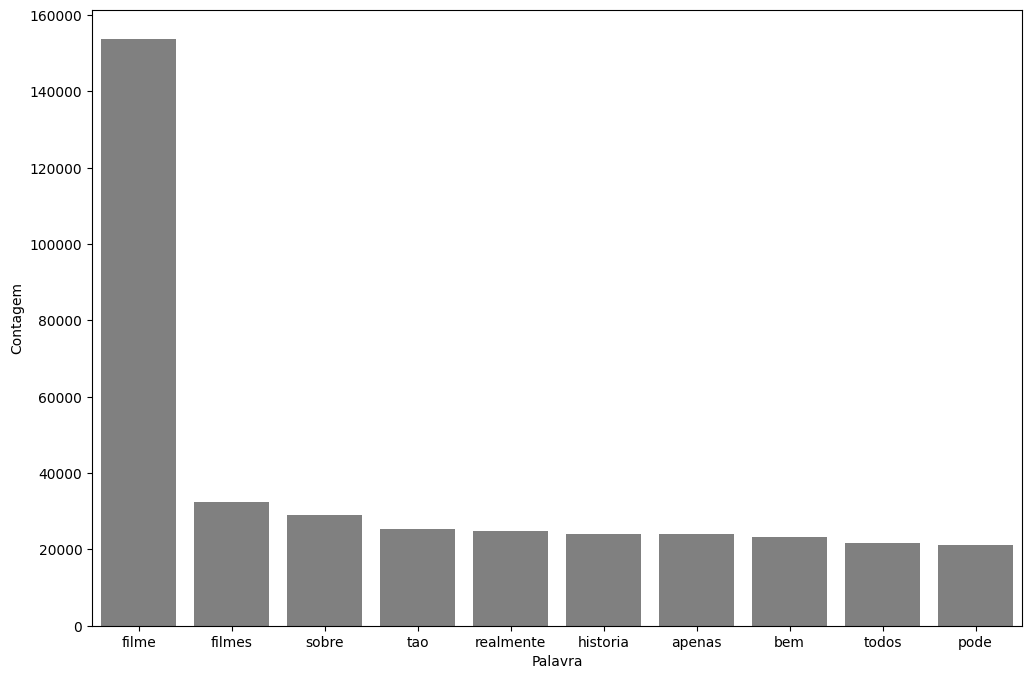

In [64]:
pareto(resenha, 'tratamento_4', 10)

## **Aula 3: Evitando Flexões e derivações nas palavras**

In [65]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to /home/ike/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [66]:
# Utilizando o RSLP para fazer a 'estemização'
from nltk import RSLPStemmer
from collections import Counter

steammer = RSLPStemmer()
teste = ['corredor', 'correr', 'correndo', 'escrever', 'escrevo', 'escrevendo', 'corro']
lista_rad = []

for i in teste:
     lista_rad.append(steammer.stem(i))
     
print(f'Radicais presentes na lista: \
      \n{set(lista_rad)}')

Radicais presentes na lista:       
{'corr', 'escrev'}


In [67]:
frase_processada = []
for opiniao in resenha['tratamento_4']:
    nova_frase = []
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(steammer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))
    
resenha['tratamento_5'] = frase_processada

In [68]:
acuracia_tratamento5 = classificar_texto(resenha, 'tratamento_5', 'classificacao')
print(acuracia_tratamento5)
print(acuracia_tratamento4)

0.6956
0.6881


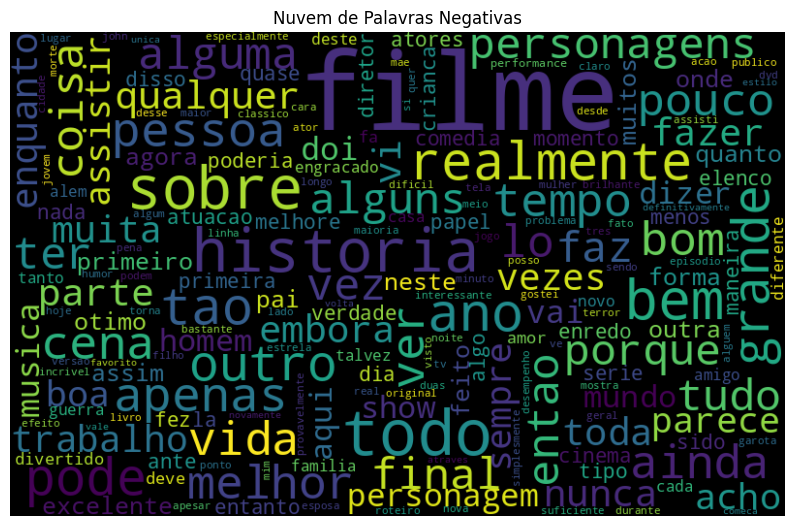

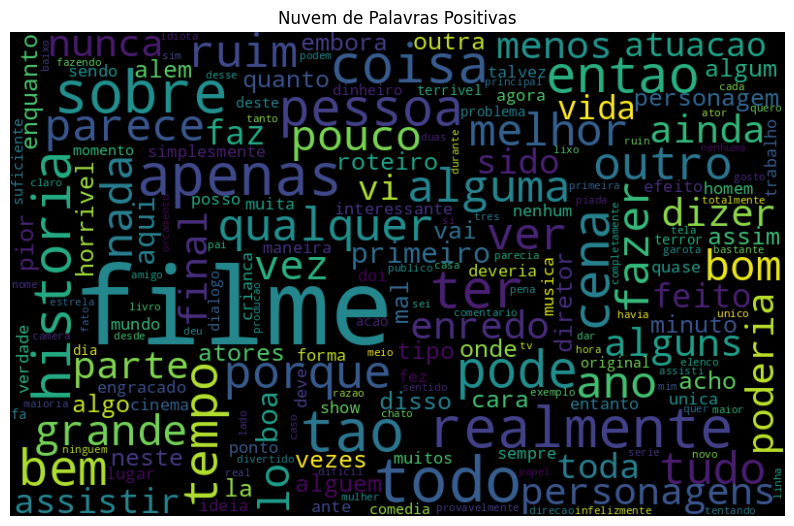

In [69]:
nuvem_palavras_neg('tratamento_4', resenha)
nuvem_palavras_pos('tratamento_4', resenha)

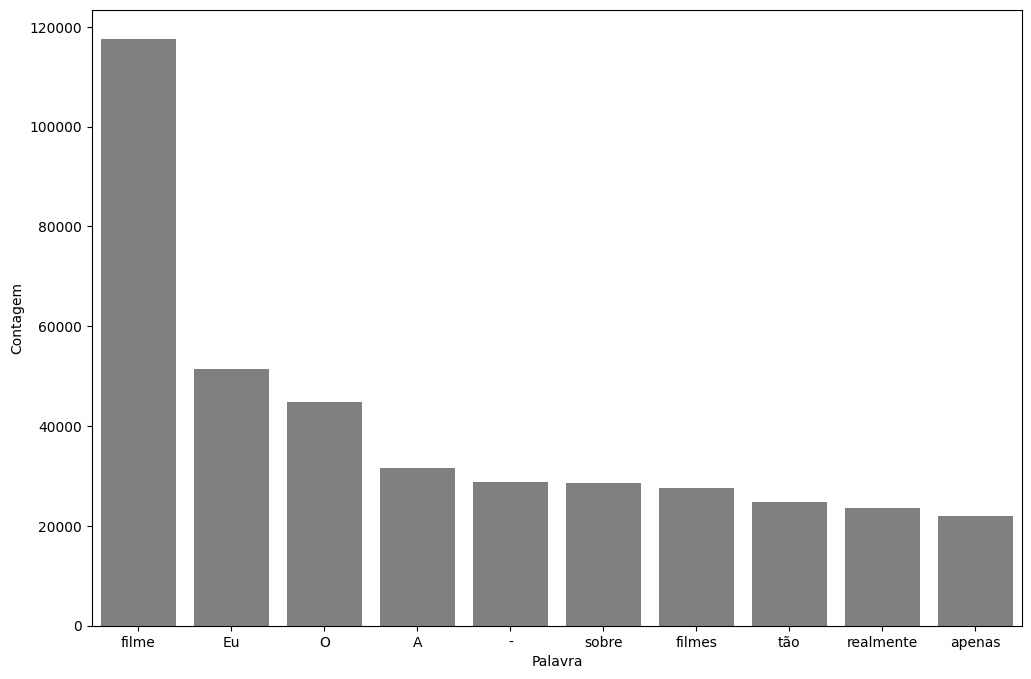

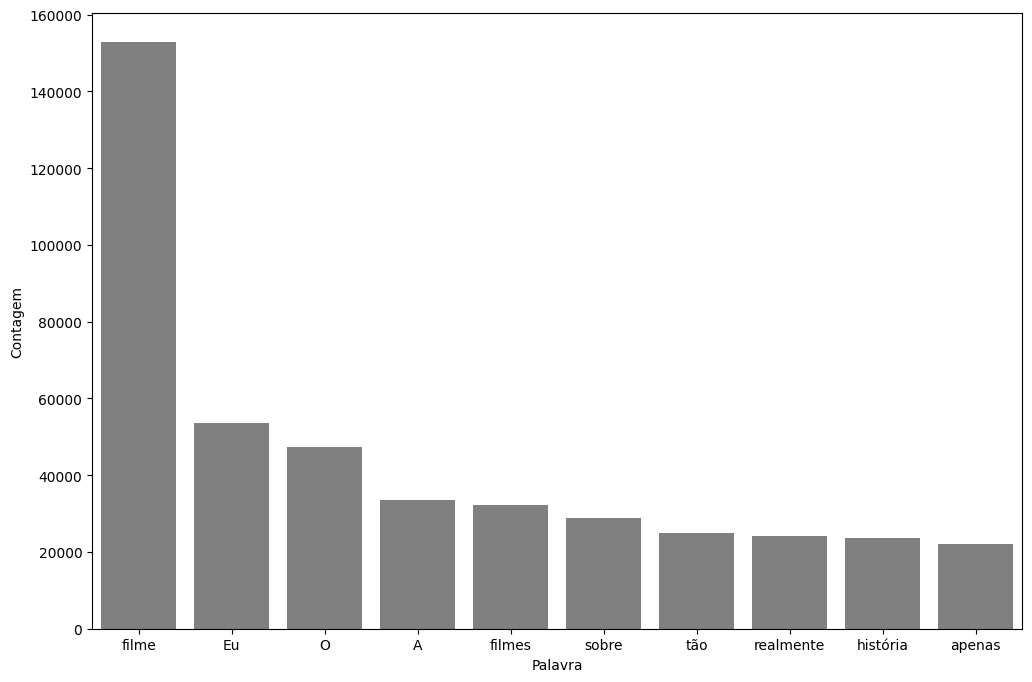

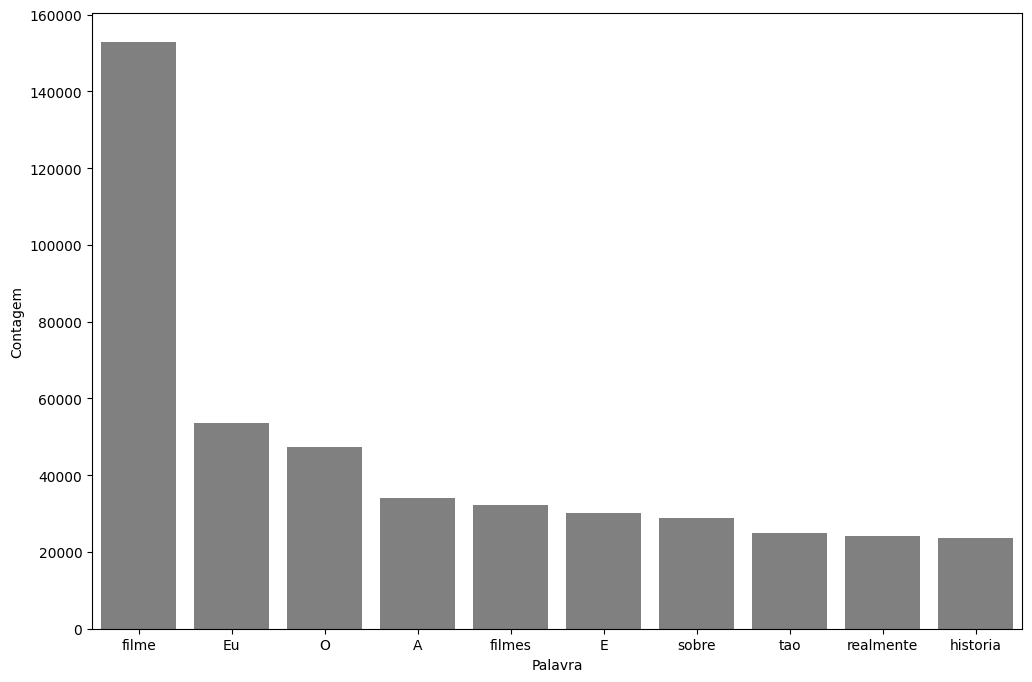

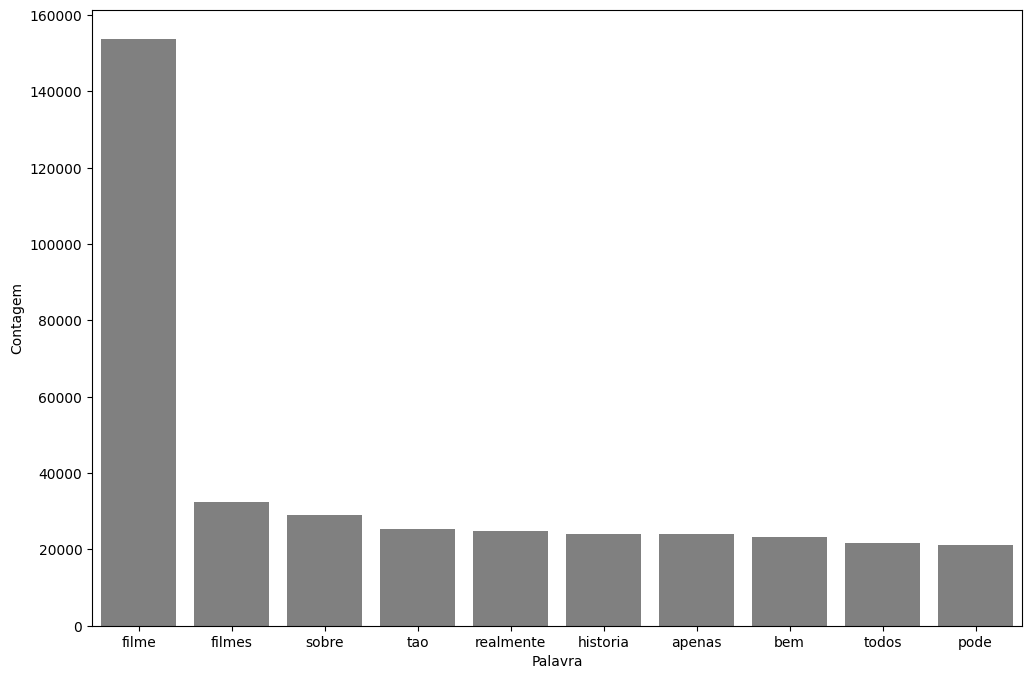

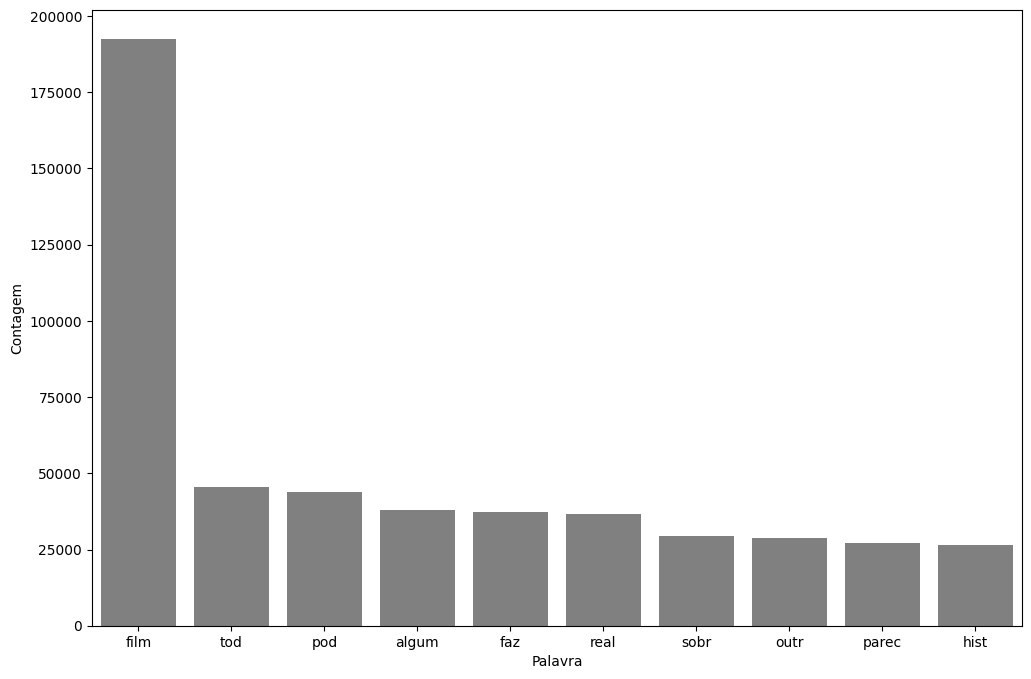

In [70]:
pareto(resenha,'tratamento_1', 10)
pareto(resenha,'tratamento_2', 10)
pareto(resenha,'tratamento_3', 10)
pareto(resenha,'tratamento_4', 10)
pareto(resenha,'tratamento_5', 10)

## **TF-IDF e Ngramas**

### **Aplicando  o TF-IFD**

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ['Assisti um filme ótimo', 'Assisti um filme péssimo']

tfidf = TfidfVectorizer(lowercase=False, max_features=50)

caracteristicas = tfidf.fit_transform(frases)

pd.DataFrame(
    caracteristicas.todense(),
    columns=tfidf.get_feature_names_out()
)

Assisti     filme   péssimo        um     ótimo
0  0.448321  0.448321  0.000000  0.448321  0.630099
1  0.448321  0.448321  0.630099  0.448321  0.000000

In [88]:
vetor_tfidf_bruto = tfidf.fit_transform(resenha['text_pt'])

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf_bruto, resenha
                                                              ['classificacao'],
                                                              random_state = 42)


regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_bruto = regressao_logistica.score(teste,classe_teste)
print(f'{acuracia_tfidf_bruto:.4f}')

0.6605


In [86]:
vetor_tfidf_tratados = tfidf.fit_transform(resenha['tratamento_5'])

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf_tratados, resenha
                                                              ['classificacao'],
                                                              random_state = 42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_tratado = regressao_logistica.score(teste,classe_teste)
print(f'{acuracia_tfidf_tratado:.4f}')

0.6965


In [83]:
print(acuracia_tratamento5)

0.6956


### **Aplicando Ngrams**

In [97]:
from nltk import ngrams

frase = 'Assisti um ótimo filme'
frase_separada = token_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)

[('Assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme')]

In [101]:
tfidf = TfidfVectorizer(lowercase = False, ngram_range = (1, 2))
vetor_tfidf = tfidf.fit_transform(resenha['tratamento_5'])

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, resenha
                                                              ['classificacao'],
                                                              random_state = 42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste,classe_teste)
print(f'{acuracia_tfidf_ngrams:.4f}')

0.8867


In [102]:
tfidf = TfidfVectorizer(lowercase = False)
vetor_tfidf = tfidf.fit_transform(resenha['tratamento_5'])

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, resenha
                                                              ['classificacao'],
                                                              random_state = 42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf = regressao_logistica.score(teste,classe_teste)
print(f'{acuracia_tfidf:.4f}')

0.8843


In [115]:
# verificando quais palavras possuem o maior peso

pesos = pd.DataFrame(
     regressao_logistica.coef_[0].T,
     index = tfidf.get_feature_names_out()
)

In [124]:
# Pesos positivos
pesos.nlargest(10, 0)

0
otim      8.215092
excel     7.903823
perfeit   6.521988
favorit   5.768388
maravilh  5.241512
incri     4.934224
hilari    4.735206
divert    4.486934
ador      4.398724
brilh     4.228919

In [125]:
# Pesos positivos
pesos.nsmallest(10, 0)

0
ruim      -9.174821
pi        -9.116361
horri     -8.681671
terri     -7.090521
chat      -6.844734
nad       -5.965650
infeliz   -5.276438
decepca   -5.128793
ridicul   -4.992068
decepcion -4.984749

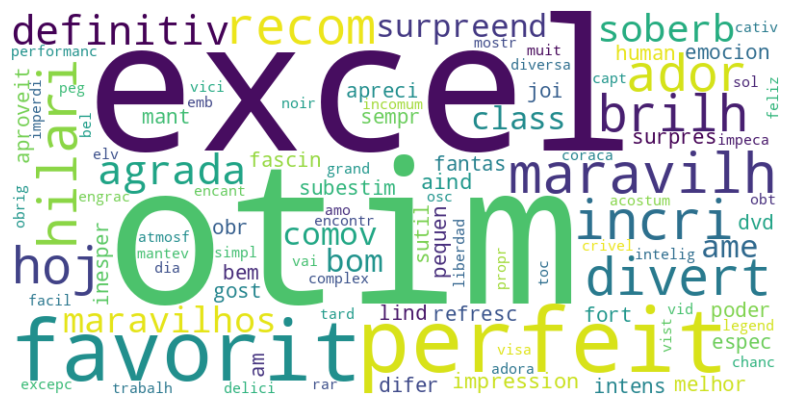

In [138]:
# Nuvem de palavras positivas
top_palavras_pos = pesos.nlargest(100, 0)

palavras_dict_pos = top_palavras_pos[0].to_dict()

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(palavras_dict_pos)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

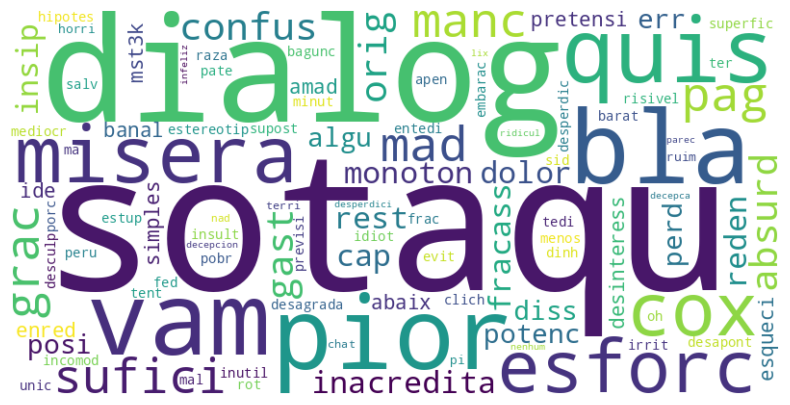

In [137]:
# Nuvem de palavras positivas
top_palavras_neg = pesos.nsmallest(100, 0)

palavras_dict_neg = top_palavras_neg[0].to_dict()
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(palavras_dict_neg)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()